<a href="https://colab.research.google.com/github/syukrighazali95/Keras_Tutorial/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [8]:
train_data.shape

(8982,)

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [14]:
train_labels.shape

(8982,)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 312us/step - loss: 2.6871 - accuracy: 0.5074 - val_loss: 1.7668 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.4534 - accuracy: 0.7018 - val_loss: 1.3083 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 106us/step - loss: 1.0671 - accuracy: 0.7815 - val_loss: 1.1337 - val_accuracy: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.8290 - accuracy: 0.8312 - val_loss: 1.0044 - val_accuracy: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.6576 - accuracy: 0.8647 - val_loss: 0.9619 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5200 - accuracy: 0.8938 - val_loss: 0.8890 - val_accuracy: 0.8220
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss

In [32]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

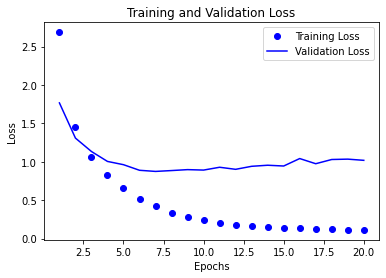

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

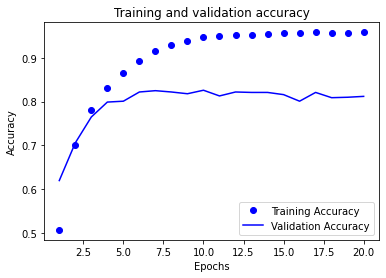

In [34]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 135us/step - loss: 2.6534 - accuracy: 0.5304 - val_loss: 1.7872 - val_accuracy: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 110us/step - loss: 1.4471 - accuracy: 0.7012 - val_loss: 1.3268 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 110us/step - loss: 1.0637 - accuracy: 0.7700 - val_loss: 1.1343 - val_accuracy: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.8387 - accuracy: 0.8161 - val_loss: 1.0569 - val_accuracy: 0.7530
Epoch 5/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.6666 - accuracy: 0.8563 - val_loss: 0.9816 - val_accuracy: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.5334 - accuracy: 0.8905 - val_loss: 0.9639 - val_accuracy: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.430

In [36]:
results

[0.9736332273440815, 0.7889581322669983]

In [0]:
predictions = model.predict(x_test)

In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

1.0000001

In [41]:
np.argmax(predictions[0])

3

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.8570 - accuracy: 0.6049 - val_loss: 1.2688 - val_accuracy: 0.7050
Epoch 2/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0380 - accuracy: 0.7626 - val_loss: 1.0507 - val_accuracy: 0.7640
Epoch 3/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.7173 - accuracy: 0.8345 - val_loss: 1.0278 - val_accuracy: 0.7720
Epoch 4/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.4951 - accuracy: 0.8921 - val_loss: 0.9926 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.3496 - accuracy: 0.9230 - val_loss: 0.9471 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.2610 - accuracy: 0.9400 - val_loss: 0.9869 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss